# The HR diagram

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")

('stars.csv', <http.client.HTTPMessage at 0x74fc806bd840>)

In [3]:
import pandas as pd
df_stars = pd.read_csv("stars.csv")

In [4]:
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


In [75]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
labels = encoder.fit_transform(df_stars['Star type'])   # array with values from 0 to 5 for the star type

In [128]:
X = np.array(df_stars[["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)"]])
X.shape

(240, 4)

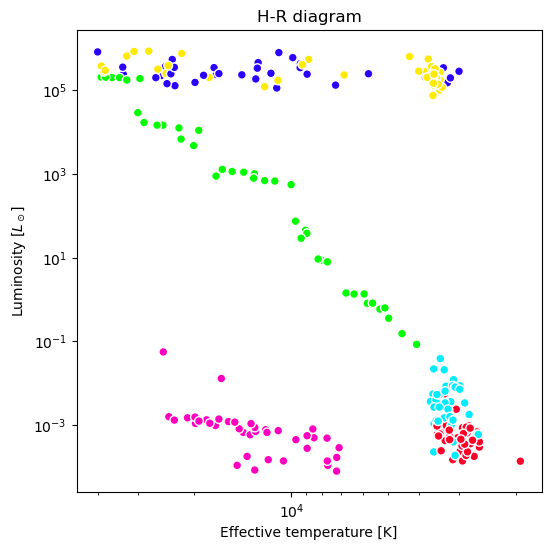

In [129]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], s=40, ec='w', c=labels, cmap='gist_rainbow')

plt.xscale('log')
plt.yscale('log')
plt.gca().invert_xaxis()
plt.title('H-R diagram')
plt.xlabel('Effective temperature [K]')
plt.ylabel('Luminosity $[L_\odot]$')
plt.show()

In [130]:
pca = PCA(n_components= 4 ) 
pca.fit(X) 

Y = pca.transform(X) 
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_ratio_ 

print('Y ',Y.shape)
print('\nEigenvectors \n',eigenvectors)
print('\nEigenvalues \n',eigenvalues)

Y  (240, 4)

Eigenvectors 
 [[ 2.09892192e-02  9.99778551e-01  1.51672530e-03 -4.06568779e-05]
 [ 9.99737574e-01 -2.09743948e-02 -9.20988063e-03 -1.91786135e-04]
 [ 9.17423519e-03 -1.70987026e-03  9.99925666e-01 -7.84678203e-03]
 [ 2.64585536e-04  2.32090121e-05  7.84473575e-03  9.99969194e-01]]

Eigenvalues 
 [9.97606313e-01 2.38789920e-03 5.78677260e-06 1.34274189e-09]


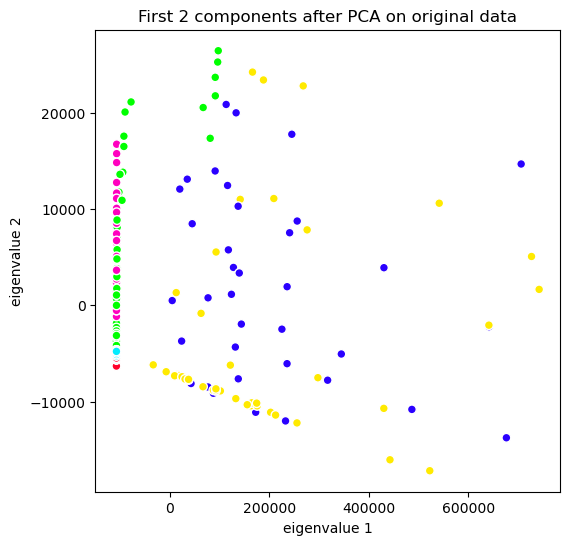

In [131]:
plt.figure(figsize=(6, 6))
plt.scatter(Y[:,0], Y[:,1], s=40, ec='w', c=labels, cmap='gist_rainbow')

plt.title('First 2 components after PCA on original data')
plt.xlabel('eigenvalue 1')
plt.ylabel('eigenvalue 2')
plt.show()

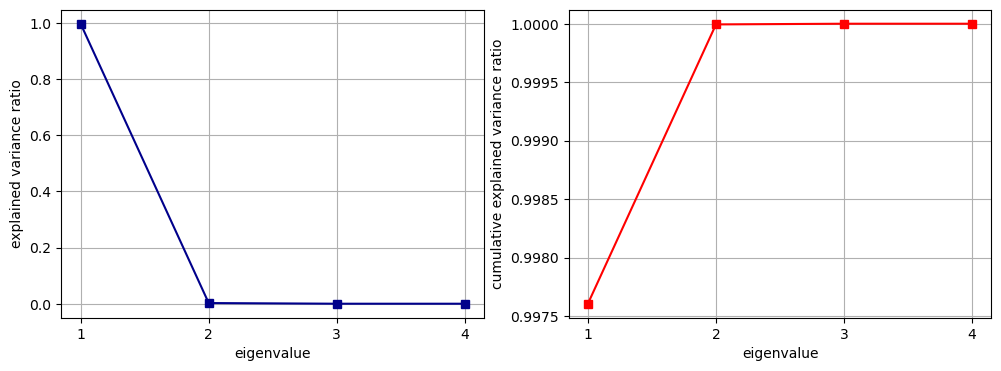

99.76 %
0.24 %
0.0 %
0.0 %


In [132]:
# explained variance ratio 
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
ax.plot(eigenvalues,'s-',c='darkblue')
plt.xlabel("eigenvalue")
plt.ylabel("explained variance ratio")
plt.xticks([0,1,2,3],[1,2,3,4])
plt.grid()

# cumulative
ax = fig.add_subplot(122)
ax.plot(np.cumsum(eigenvalues),'s-',c='red',label='cumulative')
plt.xlabel("eigenvalue")
plt.ylabel("cumulative explained variance ratio")
plt.grid()
plt.xticks([0,1,2,3],[1,2,3,4])
plt.show()

for e in eigenvalues:
    print( round(e*100,2),'%')

### Linear affine transformation (-1,1)

In [133]:
manual = False
Xlin = X.copy()
for j in range(len(Xlin[0])):
    M = max(abs(X[:,j]))
    Xlin[:,j] = X[:,j] / M

if manual==False:
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    Xlin = scaler.fit_transform(X)

In [134]:
pca = PCA(n_components= 4 ) 
pca.fit(Xlin) 

Y = pca.transform(Xlin) 
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_ratio_ 

print('Y ',Y.shape)
print('\nEigenvectors \n',eigenvectors)
print('\nEigenvalues \n',eigenvalues)

Y  (240, 4)

Eigenvectors 
 [[ 0.29874304  0.39982598  0.46366863 -0.73205408]
 [ 0.81632001  0.03596368 -0.5763485  -0.01227448]
 [ 0.46959659 -0.01569408  0.65145473  0.59568404]
 [-0.1544451   0.91575078 -0.16864323  0.330313  ]]

Eigenvalues 
 [0.63752162 0.21432776 0.0843245  0.06382612]


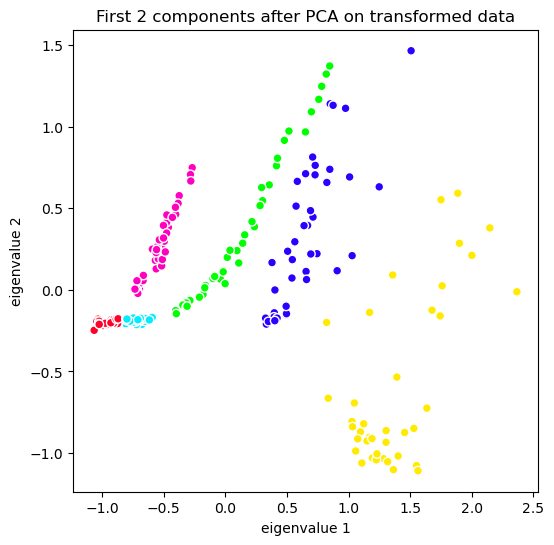

In [135]:
plt.figure(figsize=(6, 6))
plt.scatter(Y[:,0], Y[:,1], s=40, ec='w', c=labels, cmap='gist_rainbow')

plt.title('First 2 components after PCA on transformed data')
plt.xlabel('eigenvalue 1')
plt.ylabel('eigenvalue 2')
plt.show()

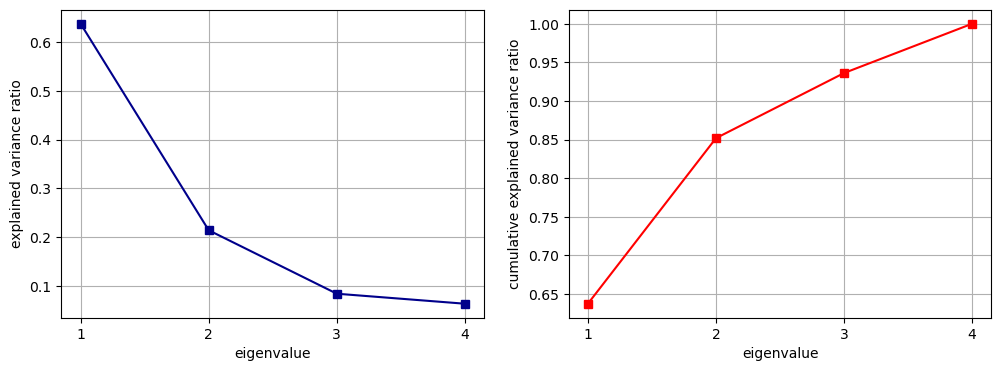

63.75 %
21.43 %
8.43 %
6.38 %


In [136]:
# explained variance ratio 
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
ax.plot(eigenvalues,'s-',c='darkblue')
plt.xlabel("eigenvalue")
plt.ylabel("explained variance ratio")
plt.xticks([0,1,2,3],[1,2,3,4])
plt.grid()

# cumulative
ax = fig.add_subplot(122)
ax.plot(np.cumsum(eigenvalues),'s-',c='red',label='cumulative')
plt.xlabel("eigenvalue")
plt.ylabel("cumulative explained variance ratio")
plt.grid()
plt.xticks([0,1,2,3],[1,2,3,4])
plt.show()

for e in eigenvalues:
    print( round(e*100,2),'%')

### Standardization

In [137]:
# standardization
scaler = StandardScaler()
Xstand = scaler.fit_transform(X)
Xstand.shape

(240, 4)

In [138]:
pca = PCA(n_components= 4 ) 
pca.fit(Xstand) 

Y = pca.transform(Xstand) 
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_ratio_ 

print('Y ',Y.shape)
print('\nEigenvectors \n',eigenvectors)
print('\nEigenvalues \n',eigenvalues)

Y  (240, 4)

Eigenvectors 
 [[ 0.35018343  0.55933789  0.47477107 -0.58232734]
 [ 0.82161262  0.00452564 -0.56898115  0.03453503]
 [-0.37607837  0.75509623 -0.53314117  0.06446119]
 [ 0.24675763  0.34198002  0.40818302  0.80965855]]

Eigenvalues 
 [0.60357391 0.23500784 0.09329645 0.0681218 ]


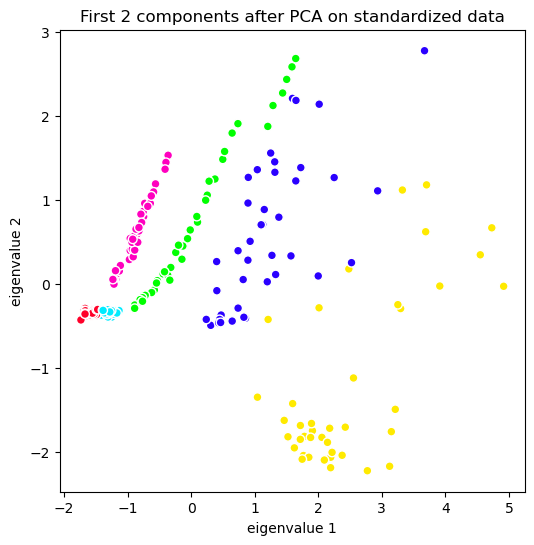

In [140]:
plt.figure(figsize=(6, 6))
plt.scatter(Y[:,0], Y[:,1], s=40, ec='w', c=labels, cmap='gist_rainbow')

plt.title('First 2 components after PCA on standardized data')
plt.xlabel('eigenvalue 1')
plt.ylabel('eigenvalue 2')
plt.show()

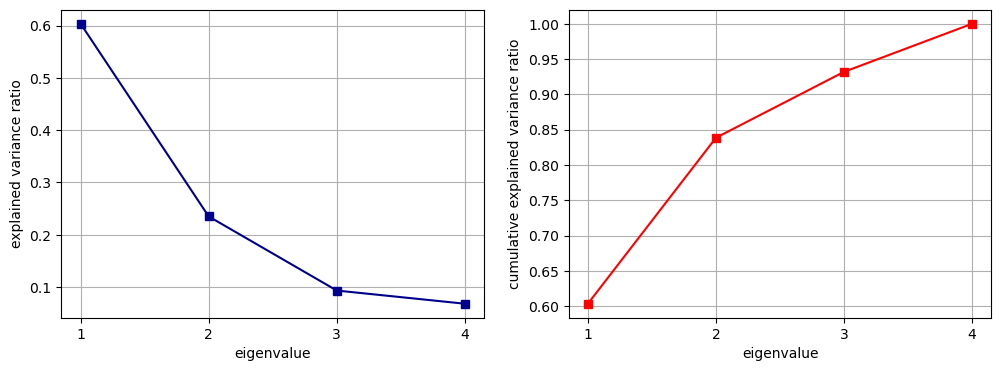

60.36 %
23.5 %
9.33 %
6.81 %


In [141]:
# explained variance ratio 
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
ax.plot(eigenvalues,'s-',c='darkblue')
plt.xlabel("eigenvalue")
plt.ylabel("explained variance ratio")
plt.xticks([0,1,2,3],[1,2,3,4])
plt.grid()

# cumulative
ax = fig.add_subplot(122)
ax.plot(np.cumsum(eigenvalues),'s-',c='red',label='cumulative')
plt.xlabel("eigenvalue")
plt.ylabel("cumulative explained variance ratio")
plt.grid()
plt.xticks([0,1,2,3],[1,2,3,4])
plt.show()

for e in eigenvalues:
    print( round(e*100,2),'%')